In [1]:
# installation
!pip install numpy
!pip install scipy

You should consider upgrading via the '/Users/Garen/pythonProject1/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Garen/pythonProject1/venv/bin/python -m pip install --upgrade pip' command.


# Preparation

In [1]:
import numpy as np
# const
K = 1000 # the dimension of X
N = 50000 # the size of dataset
# create random dataset
X0_s = np.ones([N,1]) # the first column has all values equal to one for the coefficients of beta_0
X1_s = np.random.uniform(0,1,([N,K]))
X = np.concatenate([X0_s, X1_s],axis=1)
beta = np.random.randint(0,5,size=K+1)
## Values for the normal errors

error_s = np.random.normal(0,1,N)

## Values for the y's

Y = np.dot(X,beta) + error_s
rho = 5

# a)
Estimate the value of the regression coefficients by implementing the analytical
solution. Use this solution as a benchmark for the following sections.

In order to solve the following objective function,
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 + \rho \| \beta \|_2
\end{align*}
we can derive its analytical solution $\beta_{ls}=(X^T X + \rho)^{-1}X^T y$


In [2]:
from numpy.linalg import inv
beta_ridge_exact = inv(X.T @ X + rho * np.identity(K+1)) @ X.T @ Y

# b)
Estimate the value of the regression coefficients by using the function minimize from the Python module Scipy.optimize. Try at least four available solvers and compare their performance in terms of number of iterations, number of function, gradient and hessian evaluations as well as total computational time.

In [4]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
import time

def rigid_reg(beta_ls, X, Y, rho):
    z = Y - X @ beta_ls
    return np.dot(z,z) + rho * np.dot(beta_ls, beta_ls)

### L-BFGS-B Method

In [8]:
beta0 = np.zeros(K+1)
start_time = time.time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', options={'disp': True})
end_time = time.time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Training time: 363.699641 s
      fun: 241394.70173963057
 hess_inv: <1001x1001 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -935.41166848,   199.70175466,  1553.08807816, ...,
       -2790.32685161, -1154.06292726,  -166.19742483])
  message: 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15030
      nit: 11
     njev: 15
   status: 1
  success: False
        x: array([3.95439625, 3.0303898 , 0.27010305, ..., 3.6896399 , 2.86889176,
       1.95931861])

Error in values of coefficients =   0.0855


### conjugate gradient algorithm

In [10]:
beta0 = np.zeros(K+1)
start_time = time.time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='CG', options={'disp': True})
end_time = time.time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

KeyboardInterrupt: 

### Nelder-Mead algorithm

In [ ]:
beta0 = np.zeros(K+1)
start_time = time.time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='Nelder-Mead', options={'disp': True})
end_time = time.time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

### Constrained Optimization BY Linear Approximation (COBYLA) algorithm

In [ ]:
beta0 = np.zeros(K+1)
start_time = time.time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='COBYLA', options={'disp': True})
end_time = time.time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

In [96]:
# with bounds
beta0 = np.zeros(K+1)
bounds = (())
# for i in range(K+1):
#     bounds = bounds + ((0.0, 5.0),)
start_time = time.time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', bounds = Bounds(lb = 0.0, ub= 5.0 ), options={'disp': True})
end_time = time.time()
print('Training time: %f s' %(end_time - start_time))
print('\nValues of the least squares coefficients obtained with Nelder-Mead:')
# for i in range(K+1):
#     print('beta %3d %7.3f' %(i,res.x[i]))

err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Training time: 7.442934 s

Values of the least squares coefficients obtained with Nelder-Mead:
beta   0   1.962
beta   1   0.000
beta   2   3.001
beta   3   0.000
beta   4   3.976
beta   5   1.989
beta   6   0.000
beta   7   4.010
beta   8   1.989
beta   9   2.990
beta  10   0.000
beta  11   2.047
beta  12   0.000
beta  13   2.003
beta  14   0.983
beta  15   0.998
beta  16   1.023
beta  17   1.970
beta  18   2.027
beta  19   3.995
beta  20   3.010
beta  21   2.011
beta  22   3.990
beta  23   2.991
beta  24   3.997
beta  25   2.004
beta  26   1.013
beta  27   2.007
beta  28   3.999
beta  29   0.000
beta  30   0.980
beta  31   2.000
beta  32   3.003
beta  33   0.995
beta  34   1.986
beta  35   1.018
beta  36   3.993
beta  37   4.024
beta  38   0.001
beta  39   3.002
beta  40   1.991
beta  41   0.976
beta  42   0.000
beta  43   4.007
beta  44   4.018
beta  45   1.004
beta  46   2.960
beta  47   3.997
beta  48   1.019
beta  49   1.995
beta  50   1.020
beta  51   4.019
beta  52   0.019
beta

# d)
Estimate the value of the regression coefficients of (1) by implementing the: *
1. Coordinate descent Method
2. Newton method
3. Quasi-Newton method

## i. Gradient Decent

In [11]:
# Definition of the OF
def ridge_reg(beta_ridge, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    z = Y - X @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

# Definition of the gradient

def ridge_reg_der(beta_ridge,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

# Definition of the hessian matrix

def ridge_reg_hess(beta_ls,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    ss = 2*np.dot(X.T,X) + 2 * rho
    return ss

In [13]:
# Implementation of the gradient method

(a,b) = X.shape

## Parameters for the algorithm
sigma = 0.3
alpha = 1e-6
delta = 0.5
n_iter = 200 # Maximum number of iterations
epsilon = 1e-5
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the gradient method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y) # Gradient vector
    ddirect = -grad # Descent direction
##### Armijo rule to adjust alpha ######
    alpha=1e-5
    while rigid_reg(beta_ridge + alpha * ddirect, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
#########################################
    beta_ridge = beta_ridge + alpha*ddirect

    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

# print('\nValues of the least squares coefficients - gradient method:')
# print('beta %-9s %7.3f' %('intercept',beta_ridge[0]))
# for ii in np.arange(1,b):
#     print('beta %-9s %7.3f' %(ii,beta_ridge[ii]))

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 592.85604

Number of iterations =   199
Objective function   = 85628.76057
Optimality tolerance = 10671.91584

Beta coefficient error =    0.02588


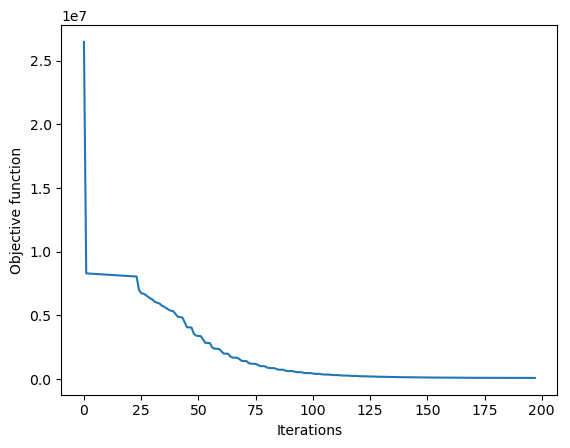

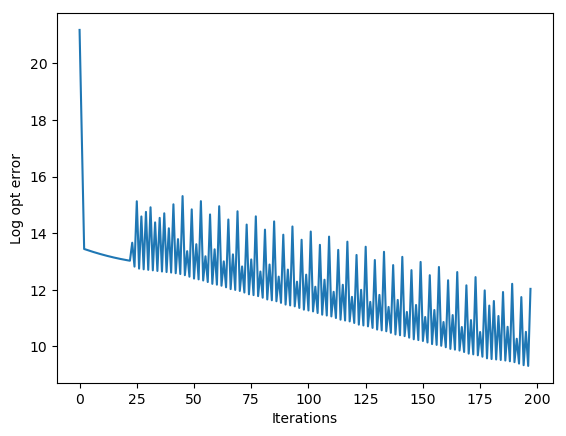

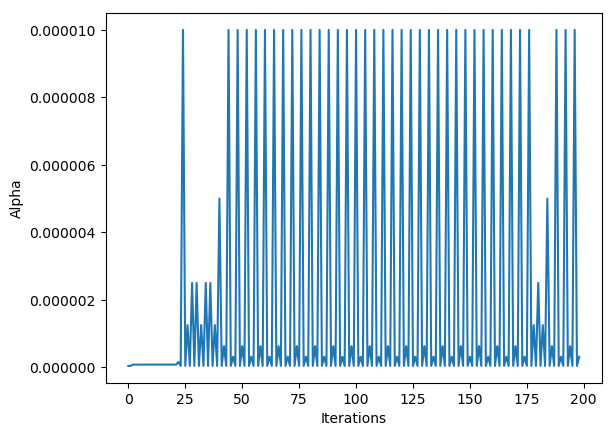

In [14]:
# Plot results showing the evolution of the algorithm
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:200]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

## ii. Newton's method

In [16]:

# Implementation of Newton's method

(a,b) = X.shape

## Parameters for the algorithm

alpha = 1e-4
n_iter = 200 # Maximum number of iterations
epsilon = 1e-5
tol = 10000
sigma = 0.1
delta = 0.1

## Initial values for the variables and data containers

beta_lsn = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement Newton's method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_lsn,X,Y)
    hess = ridge_reg_hess(beta_lsn,X,Y)
    ddirect = -np.dot(np.linalg.inv(hess),grad) # Descent direction
##### Armijo rule to adjust alpha ######
#########################################
    beta_lsn = beta_lsn + ddirect
    OF_iter[i] = rigid_reg(beta_lsn, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_lsn,ord=2)/np.linalg.norm(beta_lsn,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 21.16700

Number of iterations =     8
Objective function   = 78563.38239
Optimality tolerance =     0.00000

Beta coefficient error =    0.00000


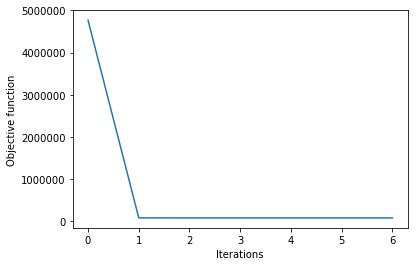

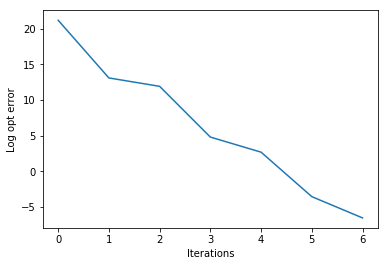

In [18]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

## iii. Quasi-Newton Method

In [21]:
# Quasi-Newton
# Implementation of the gradient method

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.5
n_iter = 500 # Maximum number of iterations
epsilon = 1e-5
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y) # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=1e-4
    # in order to satisfy Wolfe condition
    while rigid_reg(beta_ridge + alpha * p, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der(beta_ridge, X ,Y) - ridge_reg_der(beta_ridge_old, X, Y)).reshape(-1,1)
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 1128.01758

Number of iterations =   499
Objective function   = 78563.38239
Optimality tolerance =     0.70332

Beta coefficient error =    0.00000


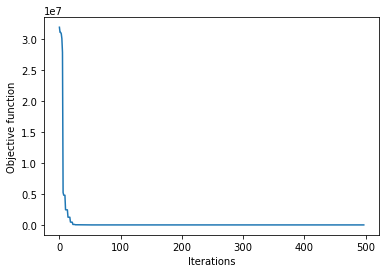

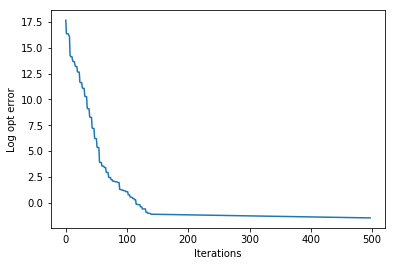

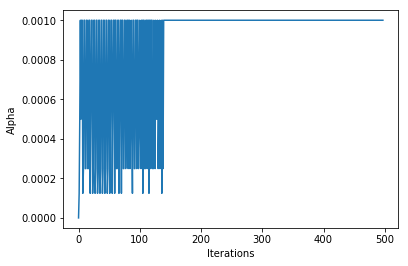

In [219]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:i]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

# e)
Estimate the value of the regression coefficients of (1) by implementing the *
1. Coordinate descent Method
2. Stochastic gradient Method
3. Three other techniques presentaed in Topic 2

# Coordinate descent Method

In [ ]:
#Descenso por coordenadas
import time
(a, b) = X.shape

def rigid_reg_der_k(beta_ridge,k, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X[:, k])
    aa = pp.squeeze() + 2 * rho * beta_ridge[k]
    return aa

niter = 100000
epsilon = 1e-9
i = 0
alpha = 1e-5
OF_iter = np.zeros(niter)
tol_iter = np.zeros(niter)
error_coord_iter = []
tol = 10
beta_coord = np.zeros(b)

time_start = time.time()

while (i < niter) and (tol > epsilon):
    k = np.random.randint(b)
    grad_k = rigid_reg_der_k(beta_coord,k,X,Y)
    grad = np.zeros(b)
    grad[k] = grad_k
    beta_coord = beta_coord - alpha*grad
    tol = np.linalg.norm(grad, ord = 2)
    tol_iter[i] = tol
    error_coord_iter.append(np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))
    i +=1


time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('number iterations =',i)
print('tolerance=',tol)
print('error', np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))

# Stochastic gradient

In [ ]:
### Redefine gradient function, to calculate the gradient just with the indexes passed as parameters
def least_sq_reg_der_stoc(beta_ls,X,Y,subset):
    beta_ls=np.matrix(beta_ls)
    Xsub = np.matrix(X[subset,:])
    Ysub = np.matrix(Y[subset,:])
    pp=-2*np.dot((Ysub-np.dot(Xsub,beta_ls.T)).T,Xsub).T
    aa= np.squeeze(np.asarray(pp))
    return aa

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha=1e-4
n_iter=100000 #maximim number iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
tol=100000
epsilon=1e-9

#### Number of samples to take into consideration in each iteration
subsetsize = 10
#### Calculate one set of subsetsize random index to choose radomly some samples
subsets = np.random.choice([x for x in range(0,a)],n_iter*subsetsize)
subsets.resize(n_iter,subsetsize)

time_start = time.time()

while (i <= n_iter-2) and (tol>epsilon):
    grad = least_sq_reg_der_stoc(beta_lsg, X, Y,subsets[i])
    ddirect = -grad
    beta_lsg = beta_lsg + alpha * ddirect
    OF_iter[i] = rigid_reg(beta_lsg, X, Y, rho)
    if i>0:
        tol = np.abs((OF_iter[i]-OF_iter[i-1])/OF_iter[i-1])
    tol_iter[i] = tol
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2)
    i=i+1
time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter[i])
print('Betas =',beta_lsg)
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))